# Assignment 3: Car's price prediction 
#### Name: Sitthiwat Damrongpreechar | Student ID: 123994

## 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib
import warnings
import ppscore as pps
 
warnings.filterwarnings('ignore')

## 2. Load data

In [2]:
#Import Cars.csv
df = pd.read_csv('/root/data/Cars.csv')
#To ensure that picking the right data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
#Print out the data's shape
print(df.shape)
#Check the statistical info
df.describe()

(8128, 13)


,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [4]:
#Check Dtype for all columns in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## 3. Exporatory Data Analysis (EDA)

### 3.1 Data considerations
This process will consider about the data cleaning to ensure the quality, integrity, and usefulness of data.
#### 3.1.1 Mapping feature "owner" using the label encoder.
The catergorical features have to be encoded before doing the analysis later on.

In [6]:
# Find unique vaules in df.owner
print(np.unique(df.owner))
#Label encoder
from sklearn.preprocessing import LabelEncoder
labelEncoder=LabelEncoder()
encoded_owner = labelEncoder.fit_transform(df['owner'])
# replacing the owner feature
df['owner']= encoded_owner
# Check that owner are already mapped
print(np.unique(df.owner))

['First Owner' 'Fourth & Above Owner' 'Second Owner' 'Test Drive Car'
 'Third Owner']
[0 1 2 3 4]


In [7]:
# Check the 'owner' feature
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,4,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,0,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,0,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


#### 3.1.2 Remove all rows with CNG and LPG in feature "fuel"

In [8]:
# Check elements in feature 'fuel' and the amount of rows before removing
print(np.unique(df.fuel))
print(df.shape)
# Remove elements "CNG" and "LPG"
df.drop(df[df.fuel == 'CNG'].index, inplace=True)
df.drop(df[df.fuel == 'LPG'].index, inplace=True)

['CNG' 'Diesel' 'LPG' 'Petrol']
(8128, 13)


In [9]:
# Double check
print(np.unique(df.fuel))
print(df.shape)

['Diesel' 'Petrol']
(8033, 13)


#### 3.1.3 Remove “kmpl” from feature "mileage" and convert the column to numerical type

In [10]:
# Replace ' kmpl' with ''
df.mileage= (df['mileage'].str.replace(' kmpl', '')).astype(float)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,0,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,4,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,0,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,0,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


#### 3.1.4 Remove “CC” from feature "engine" and convert the column to numerical type

In [11]:
# Replace ' CC' with ''
df.engine= (df['engine'].str.replace(' CC', '')).astype(float)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,0,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,4,17.70,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,0,23.00,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,0,16.10,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


#### 3.1.5 Remove “bhp” from feature "max_power" and convert the column to numerical type

In [12]:
# Replace ' bhp' with ''
df.max_power= (df['max_power'].str.replace(' bhp', '')).astype(float)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,0,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,4,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,0,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,0,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


#### 3.1.6 For the feature brand, take only the first word and remove the rest

In [13]:
df.name = df.name.str.split(' ').str[0]
# Change 'name' to 'brand'
df.rename(columns ={"name":"brand"}, inplace = True)
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,0,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,4,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,0,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,0,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


#### 3.1.7 Drop the feature 'torque'

In [14]:
del df['torque']
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,0,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,4,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,0,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,0,16.10,1298.0,88.20,5.0


#### 3.1.8 Delete all row that related to "Test Drive Cars"

In [15]:
#Check the rows before deleting
print(df.shape)
#Delete
df.drop(df[df.owner == 3].index, inplace=True)
#Double check the result
print(np.unique(df.owner))
print(df.shape)

(8033, 12)
[0 1 2 4]
(8028, 12)


#### Cleaned Data

In [16]:
# Check the clean data
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,0,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,4,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,0,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,0,16.10,1298.0,88.20,5.0


### 3.2 Univariate analyis
#### 3.2.1 countplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Skoda'),
  Text(2, 0, 'Honda'),
  Text(3, 0, 'Hyundai'),
  Text(4, 0, 'Toyota'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'Renault'),
  Text(7, 0, 'Mahindra'),
  Text(8, 0, 'Tata'),
  Text(9, 0, 'Chevrolet'),
  Text(10, 0, 'Fiat'),
  Text(11, 0, 'Datsun'),
  Text(12, 0, 'Jeep'),
  Text(13, 0, 'Mercedes-Benz'),
  Text(14, 0, 'Mitsubishi'),
  Text(15, 0, 'Audi'),
  Text(16, 0, 'Volkswagen'),
  Text(17, 0, 'BMW'),
  Text(18, 0, 'Nissan'),
  Text(19, 0, 'Lexus'),
  Text(20, 0, 'Jaguar'),
  Text(21, 0, 'Land'),
  Text(22, 0, 'MG'),
  Text(23, 0, 'Volvo'),
  Text(24, 0, 'Daewoo'),
  Text(25, 0, 'Kia'),
  Text(26, 0, 'Force'),
  Text(27, 0, 'Ambassador'),
  Text(28, 0, 'Ashok'),
  Text(29, 0, 'Isuzu'),
  Text(30, 0, 'Opel'),
  Text(31, 0, 'Peugeot')])

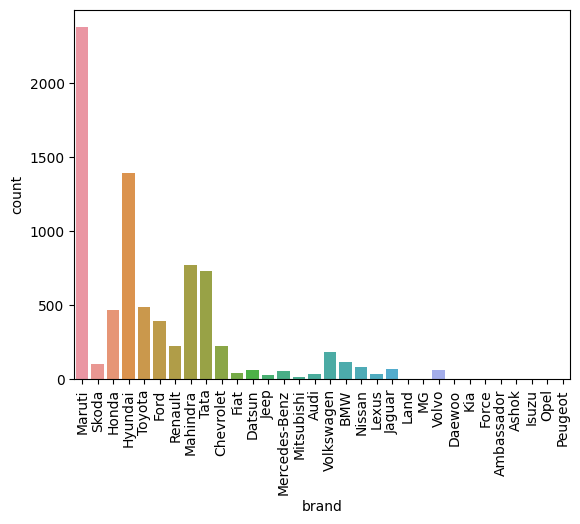

In [17]:
# Check the occurance in categorical feature 'brand'
sns.countplot(data = df, x = 'brand')
plt.xticks(rotation = 'vertical')

#### 3.2.2 Distribution plot

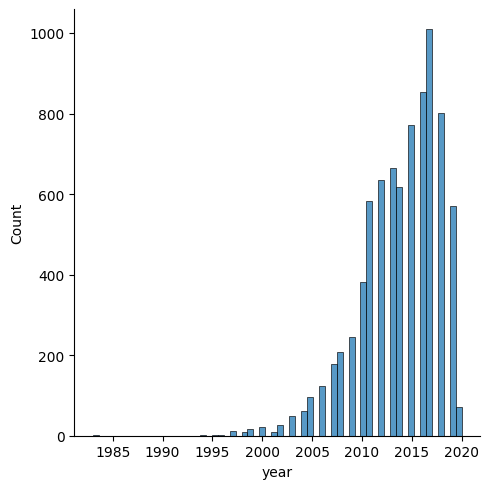

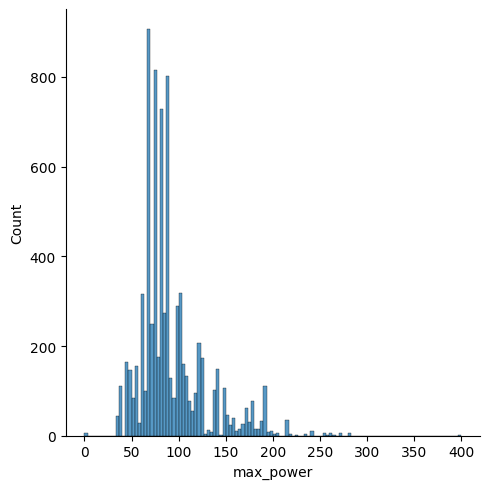

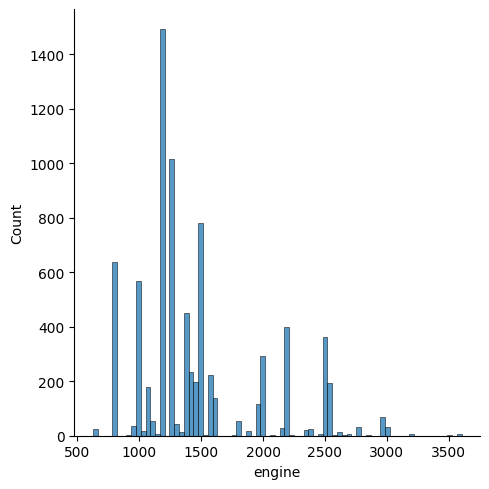

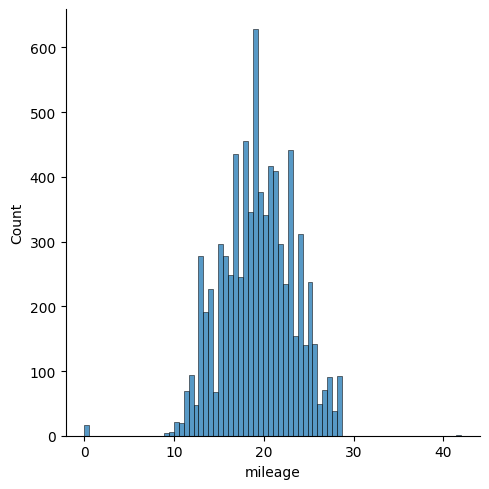

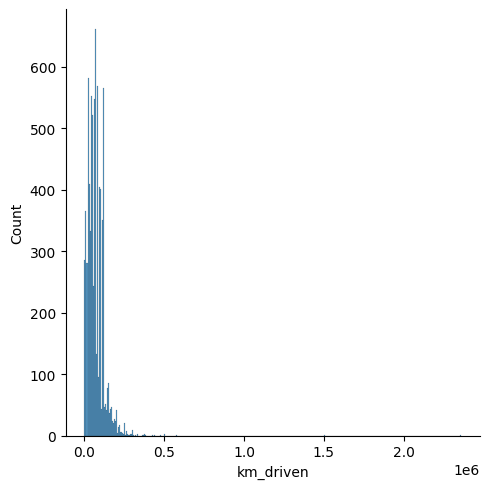

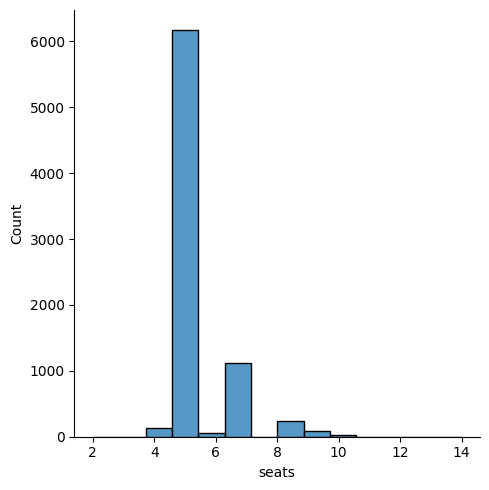

In [18]:
# Plotting the distribution of all numerical feature.ChildProcessError
sns.displot(data = df, x = 'year')
sns.displot(data = df, x = 'max_power')
sns.displot(data = df, x = 'engine')
sns.displot(data = df, x = 'mileage') 
sns.displot(data = df, x = 'km_driven')
sns.displot(data = df, x = 'seats')

### 3.3 Multivariate analysis
#### 3.3.1 Box plot

<Axes: xlabel='owner', ylabel='selling_price'>

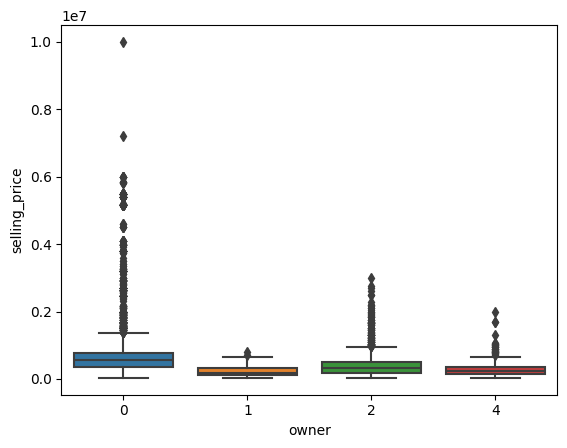

In [19]:
# Check the box plot of owner
sns.boxplot(x = df["owner"], y = df["selling_price"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Skoda'),
  Text(2, 0, 'Honda'),
  Text(3, 0, 'Hyundai'),
  Text(4, 0, 'Toyota'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'Renault'),
  Text(7, 0, 'Mahindra'),
  Text(8, 0, 'Tata'),
  Text(9, 0, 'Chevrolet'),
  Text(10, 0, 'Fiat'),
  Text(11, 0, 'Datsun'),
  Text(12, 0, 'Jeep'),
  Text(13, 0, 'Mercedes-Benz'),
  Text(14, 0, 'Mitsubishi'),
  Text(15, 0, 'Audi'),
  Text(16, 0, 'Volkswagen'),
  Text(17, 0, 'BMW'),
  Text(18, 0, 'Nissan'),
  Text(19, 0, 'Lexus'),
  Text(20, 0, 'Jaguar'),
  Text(21, 0, 'Land'),
  Text(22, 0, 'MG'),
  Text(23, 0, 'Volvo'),
  Text(24, 0, 'Daewoo'),
  Text(25, 0, 'Kia'),
  Text(26, 0, 'Force'),
  Text(27, 0, 'Ambassador'),
  Text(28, 0, 'Ashok'),
  Text(29, 0, 'Isuzu'),
  Text(30, 0, 'Opel'),
  Text(31, 0, 'Peugeot')])

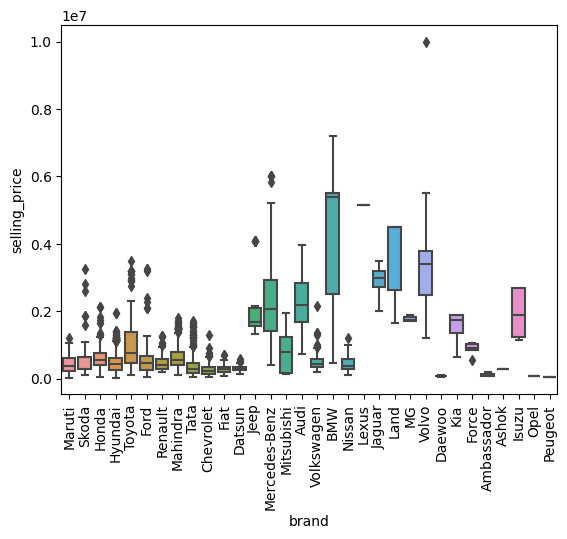

In [20]:
# Check the box plot of brand
sns.boxplot(x = df["brand"], y = df["selling_price"])
plt.xticks(rotation = 'vertical')

(array([0, 1]), [Text(0, 0, 'Diesel'), Text(1, 0, 'Petrol')])

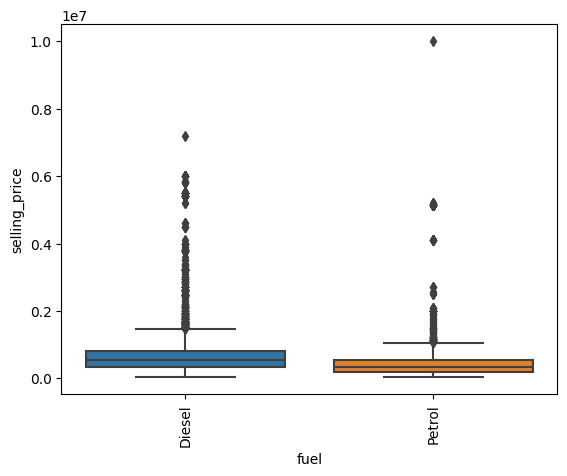

In [21]:
# Check the box plot of fuel
sns.boxplot(x = df["fuel"], y = df["selling_price"])
plt.xticks(rotation = 'vertical')

(array([0, 1, 2]),
 [Text(0, 0, 'Individual'),
  Text(1, 0, 'Dealer'),
  Text(2, 0, 'Trustmark Dealer')])

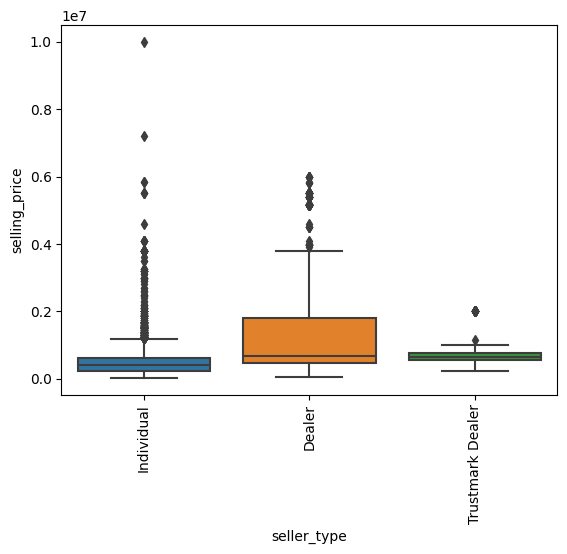

In [22]:
# Check the box plot of seller_type
sns.boxplot(x = df["seller_type"], y = df["selling_price"])
plt.xticks(rotation = 'vertical')

(array([0, 1]), [Text(0, 0, 'Manual'), Text(1, 0, 'Automatic')])

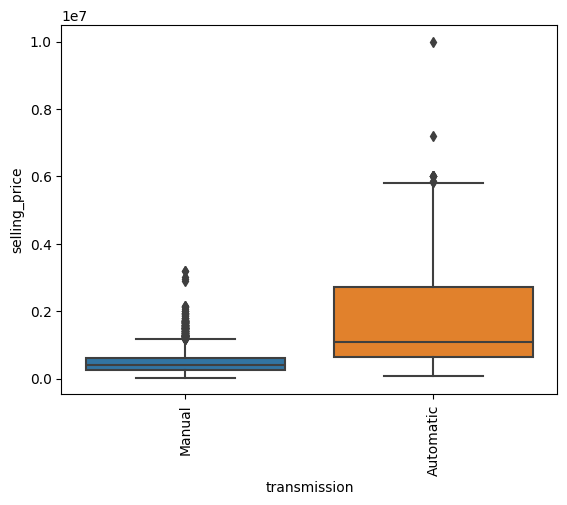

In [23]:
# Check the box plot of transmission
sns.boxplot(x = df["transmission"], y = df["selling_price"])
plt.xticks(rotation = 'vertical')

#### Encoding

In [24]:
# Checking uniques of all categorical features
print(np.unique(df.brand))
print(np.unique(df.fuel))
print(np.unique(df.seller_type))
print(np.unique(df.transmission))

['Ambassador' 'Ashok' 'Audi' 'BMW' 'Chevrolet' 'Daewoo' 'Datsun' 'Fiat'
 'Force' 'Ford' 'Honda' 'Hyundai' 'Isuzu' 'Jaguar' 'Jeep' 'Kia' 'Land'
 'Lexus' 'MG' 'Mahindra' 'Maruti' 'Mercedes-Benz' 'Mitsubishi' 'Nissan'
 'Opel' 'Peugeot' 'Renault' 'Skoda' 'Tata' 'Toyota' 'Volkswagen' 'Volvo']
['Diesel' 'Petrol']
['Dealer' 'Individual' 'Trustmark Dealer']
['Automatic' 'Manual']


In [25]:
# band encoder
dummy_variables = pd.get_dummies(df['brand'])
df = pd.concat([df, dummy_variables], axis=1)
df.drop(columns='brand',inplace=True)
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,2014,450000,145500,Diesel,Individual,Manual,0,23.40,1248.0,74.00,...,0,0,0,0,0,0,0,0,0,0
1,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,...,0,0,0,0,0,1,0,0,0,0
2,2006,158000,140000,Petrol,Individual,Manual,4,17.70,1497.0,78.00,...,0,0,0,0,0,0,0,0,0,0
3,2010,225000,127000,Diesel,Individual,Manual,0,23.00,1396.0,90.00,...,0,0,0,0,0,0,0,0,0,0
4,2007,130000,120000,Petrol,Individual,Manual,0,16.10,1298.0,88.20,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,0,18.50,1197.0,82.85,...,0,0,0,0,0,0,0,0,0,0
8124,2007,135000,119000,Diesel,Individual,Manual,1,16.80,1493.0,110.00,...,0,0,0,0,0,0,0,0,0,0
8125,2009,382000,120000,Diesel,Individual,Manual,0,19.30,1248.0,73.90,...,0,0,0,0,0,0,0,0,0,0
8126,2013,290000,25000,Diesel,Individual,Manual,0,23.57,1396.0,70.00,...,0,0,0,0,0,0,1,0,0,0


In [26]:
# For brand that has a lot of category, the one-hot encoder will be used. ** I can't do it, so I change to label encoder
# For others feature use the label encoder is fine.
encoded_seller_type = labelEncoder.fit_transform(df['seller_type'])
encoded_transmission = labelEncoder.fit_transform(df['transmission']) 
encoded_fuel = labelEncoder.fit_transform(df['fuel'])
# encoded_brand = labelEncoder.fit_transform(df['brand'])
# df['brand']=encoded_brand
df['fuel']= encoded_fuel
df['seller_type']= encoded_seller_type
df['transmission']= encoded_transmission
df.head()


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,2014,450000,145500,0,1,1,0,23.40,1248.0,74.00,...,0,0,0,0,0,0,0,0,0,0
1,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,...,0,0,0,0,0,1,0,0,0,0
2,2006,158000,140000,1,1,1,4,17.70,1497.0,78.00,...,0,0,0,0,0,0,0,0,0,0
3,2010,225000,127000,0,1,1,0,23.00,1396.0,90.00,...,0,0,0,0,0,0,0,0,0,0
4,2007,130000,120000,1,1,1,0,16.10,1298.0,88.20,...,0,0,0,0,0,0,0,0,0,0


#### 3.3.2 Scatterplot

#### 3.3.3 Correlation matrix
Displays the correlation coefficients between many features which useful for features selections.

In [27]:
#Create another dataframe to used with pps and heatmap(Just in case that their are the features that I want to drop.)
df_corr = df.drop(columns=['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep',
       'Kia', 'Land', 'Lexus', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz',
       'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo'])
type(df_corr)
df_corr

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,0,1,1,0,23.40,1248.0,74.00,5.0
1,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,2006,158000,140000,1,1,1,4,17.70,1497.0,78.00,5.0
3,2010,225000,127000,0,1,1,0,23.00,1396.0,90.00,5.0
4,2007,130000,120000,1,1,1,0,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,1,1,1,0,18.50,1197.0,82.85,5.0
8124,2007,135000,119000,0,1,1,1,16.80,1493.0,110.00,5.0
8125,2009,382000,120000,0,1,1,0,19.30,1248.0,73.90,5.0
8126,2013,290000,25000,0,1,1,0,23.57,1396.0,70.00,5.0


<Axes: >

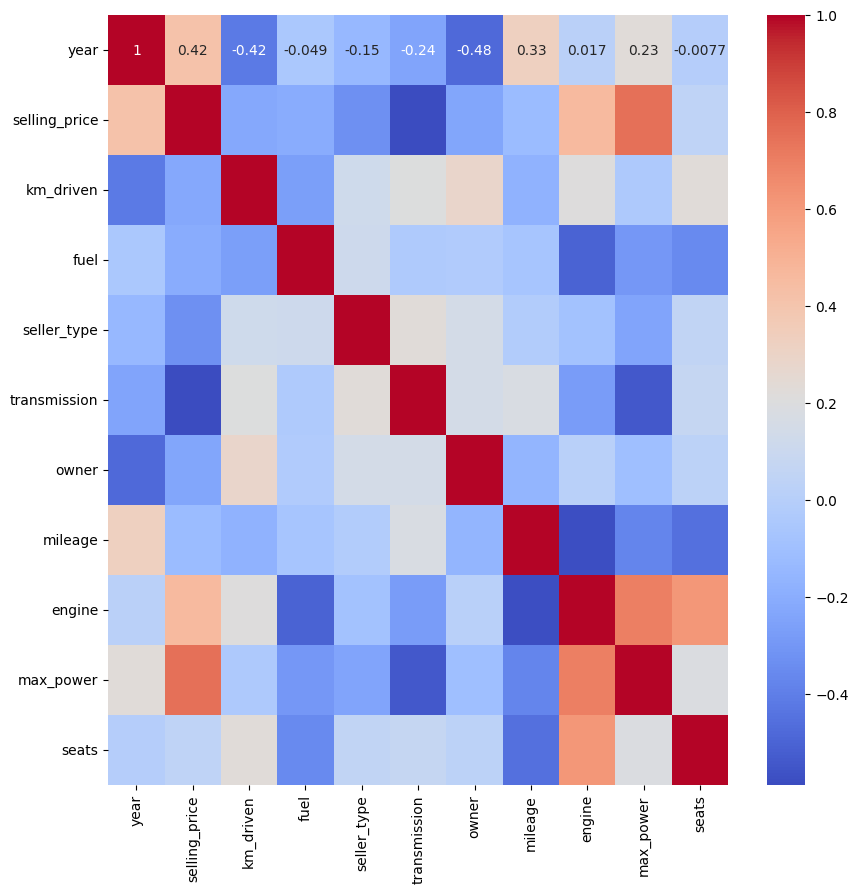

In [28]:
#Create the correlation matrix
plt.figure(figsize=(10,10))

sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")

#### 3.3.4 Predictive Power Score
Predictive Power Score provides a way to quantify how well individual features can predict the target variable.

<Axes: xlabel='x', ylabel='y'>

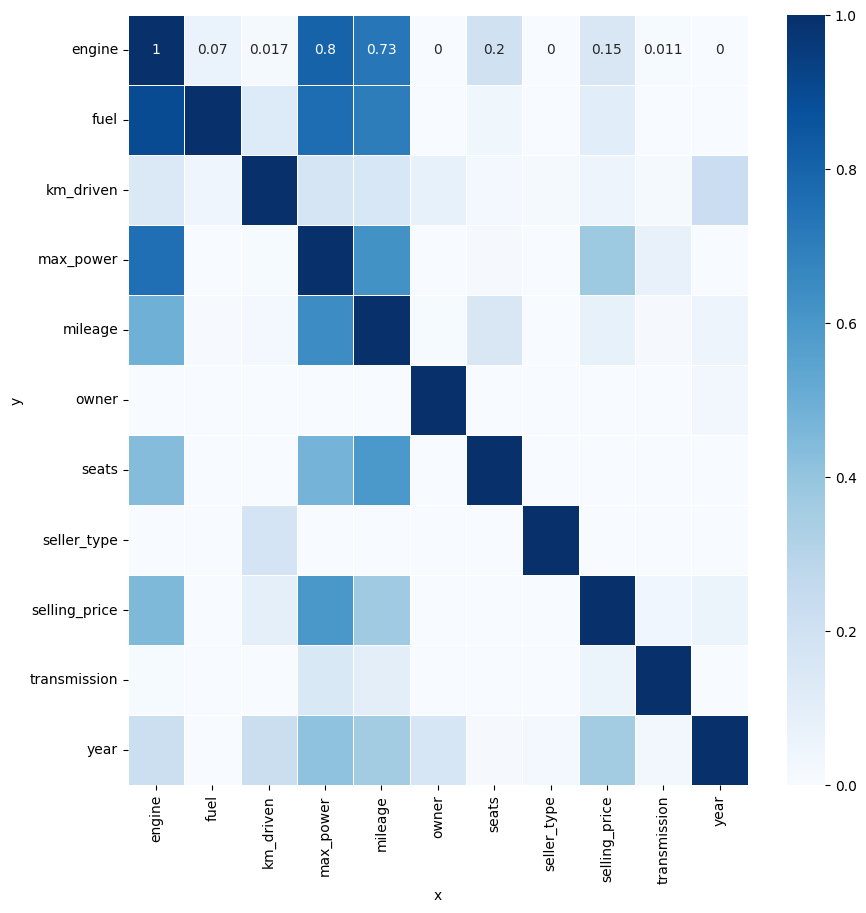

In [29]:

matrix_df_pps = pps.matrix(df_corr)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize=(10,10))
sns.heatmap(matrix_df_pps, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## 4. Feature Engineering (Skipped)

## 5. Feature Selection
From EDA part, the features that have been selected is 'max_power', 'year', 'fuel'. The reasons that 'engine' is not selected because 'engine' has too much correlation score with the 'max_power'. So, the 'max_power' is choosed due to the higher score in pps.
### 5.1 Train Test split

In [30]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep',
       'Kia', 'Land', 'Lexus', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz',
       'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo'],
      dtype='object')

In [31]:
#x is our strong features
X = df[['max_power', 'year','fuel','Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep',
       'Kia', 'Land', 'Lexus', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz',
       'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo']]
# Transform the label to prevent unstable prediction.
y = np.log(df['selling_price'])

In [32]:
#Check the selling price
df['selling_price']

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8028, dtype: int64

In [33]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7040)

## 6. Preprocessing
### 6.1 NULL values

In [34]:
#check for null values in features at test data
X_train.isna().sum()

max_power        170
year               0
fuel               0
Ambassador         0
Ashok              0
Audi               0
BMW                0
Chevrolet          0
Daewoo             0
Datsun             0
Fiat               0
Force              0
Ford               0
Honda              0
Hyundai            0
Isuzu              0
Jaguar             0
Jeep               0
Kia                0
Land               0
Lexus              0
MG                 0
Mahindra           0
Maruti             0
Mercedes-Benz      0
Mitsubishi         0
Nissan             0
Opel               0
Peugeot            0
Renault            0
Skoda              0
Tata               0
Toyota             0
Volkswagen         0
Volvo              0
dtype: int64

In [35]:
#check for null values in features at test data
X_test.isna().sum()

max_power        38
year              0
fuel              0
Ambassador        0
Ashok             0
Audi              0
BMW               0
Chevrolet         0
Daewoo            0
Datsun            0
Fiat              0
Force             0
Ford              0
Honda             0
Hyundai           0
Isuzu             0
Jaguar            0
Jeep              0
Kia               0
Land              0
Lexus             0
MG                0
Mahindra          0
Maruti            0
Mercedes-Benz     0
Mitsubishi        0
Nissan            0
Opel              0
Peugeot           0
Renault           0
Skoda             0
Tata              0
Toyota            0
Volkswagen        0
Volvo             0
dtype: int64

In [36]:
#check for null values in labels at test/train data
print(y_train.isna().sum())
print(y_test.isna().sum())

0
0


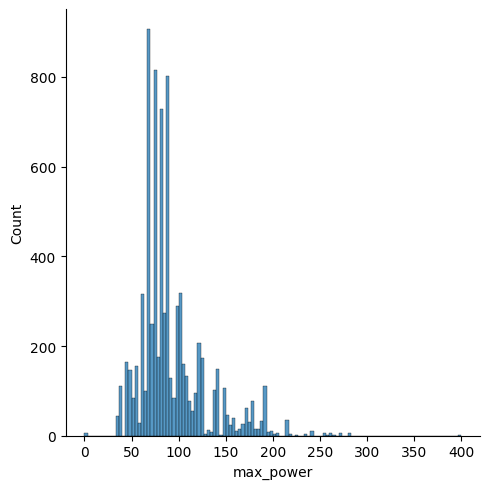

In [37]:
# plot the 'max_power' feature for considering the filling value
sns.displot(data=df, x='max_power')

In [38]:
# The 'max_power' plot = right-skewed distribution plot, the Null should be filled by median.
# Fill only X_train, do not fill y_train (drop na out)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [39]:
# Fill the testing set with X_train's median
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [40]:
#Double check all dataset
print(X_train.isna().sum(),"\n")
print(X_test.isna().sum(),"\n")
print(y_train.isna().sum())
print(y_test.isna().sum())

max_power        0
year             0
fuel             0
Ambassador       0
Ashok            0
Audi             0
BMW              0
Chevrolet        0
Daewoo           0
Datsun           0
Fiat             0
Force            0
Ford             0
Honda            0
Hyundai          0
Isuzu            0
Jaguar           0
Jeep             0
Kia              0
Land             0
Lexus            0
MG               0
Mahindra         0
Maruti           0
Mercedes-Benz    0
Mitsubishi       0
Nissan           0
Opel             0
Peugeot          0
Renault          0
Skoda            0
Tata             0
Toyota           0
Volkswagen       0
Volvo            0
dtype: int64 

max_power        0
year             0
fuel             0
Ambassador       0
Ashok            0
Audi             0
BMW              0
Chevrolet        0
Daewoo           0
Datsun           0
Fiat             0
Force            0
Ford             0
Honda            0
Hyundai          0
Isuzu            0
Jaguar          

### 6.2 Cheking the Outliers
Outliers have a greatly effect with some algorithms, so the checking this element is also crucial.

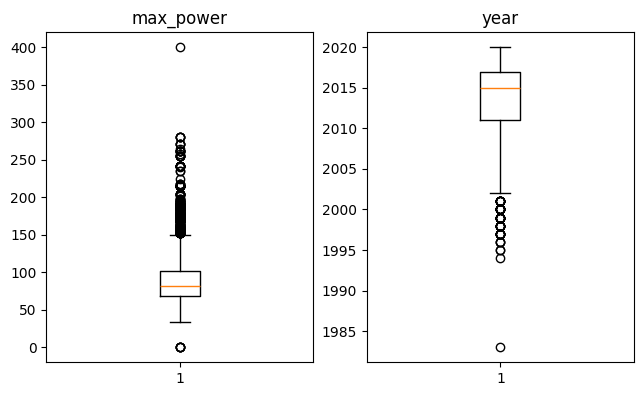

In [41]:
#Dict. of the features
#feat_dict = {'max_power':1, 'mileage':2,'engine':3,'owner':4,'km_driven':5}
feat_dict = {'max_power':1, 'year':2}
#Plotting the box plot for outliers dectection in each feature
plt.figure(figsize=(20,30))
for item,i in feat_dict.items():
    plt.subplot(6,5,i)
    plt.boxplot(X_train[item])
    plt.title(item)

In [42]:
#Calculate the outliers 
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [43]:
#Loop the outlier functions
for col in X_train[['max_power','year']]:
    outlier_count(col)


---------------max_power---------------

Number of outliers: 471
Percent of data that is outlier: 7.33%

---------------year---------------

Number of outliers: 63
Percent of data that is outlier: 0.98%


### 6.3 Scaling
Because the data has a different range of values, that can cause dominant features and effects to the predict model. To prevent the domination between them, the scale must be applied.

In [44]:
from sklearn.preprocessing import MinMaxScaler #Assignment1 = StandardScaler
# Do the scaler for train and test data set
scale_cols = ['max_power','year'] 
scaler = MinMaxScaler()
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols]  = scaler.transform(X_test[scale_cols])

In [45]:
# check shapes of all data set
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 35)
Shape of X_test:  (1606, 35)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


In [46]:
# Check X_train and X_test
print(X_train.head())
print(X_test.head())

      max_power      year  fuel  Ambassador  Ashok  Audi  BMW  Chevrolet  \
5341    0.13410  0.945946     1           0      0     0    0          0   
2300    0.22175  0.918919     1           0      0     0    0          0   
5635    0.26170  0.675676     1           0      0     0    0          0   
4934    0.22125  0.891892     0           0      0     0    0          0   
6016    0.19725  0.756757     1           0      0     0    0          0   

      Daewoo  Datsun  ...  Mitsubishi  Nissan  Opel  Peugeot  Renault  Skoda  \
5341       0       1  ...           0       0     0        0        0      0   
2300       0       0  ...           0       0     0        0        0      0   
5635       0       0  ...           0       0     0        0        0      0   
4934       0       0  ...           0       0     0        0        0      0   
6016       0       0  ...           0       0     0        0        0      0   

      Tata  Toyota  Volkswagen  Volvo  
5341     0       0    

In [47]:
# Check y_train and y_test
print(y_train.head())
print(y_test.head())

5341    12.287653
2300    13.384728
5635    11.617285
4934    13.764217
6016    12.476100
Name: selling_price, dtype: float64
5354    12.873902
2234    13.976779
2936    13.329378
7726    12.765688
1739    13.142164
Name: selling_price, dtype: float64


In [48]:
#Convert all dat to numpy array befor modeling.
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
print("Shape of X_train: ", type(X_train))
print("Shape of X_test: ", type(X_test))
print("Shape of y_train: ", type(y_train))
print("Shape of y_test: ", type(y_test))

Shape of X_train:  <class 'numpy.ndarray'>
Shape of X_test:  <class 'numpy.ndarray'>
Shape of y_train:  <class 'numpy.ndarray'>
Shape of y_test:  <class 'numpy.ndarray'>


## 7. Modeling

### 7.1 Mlflow prepare
This assignment is using the Mlflow to manage modeling part. Mlflow is the open-source platform that use to manage the life-cycle of meachine learning run, which convinece for tracking every run in the assignment.

In [49]:
import mlflow, os
# set tracking uri
mlflow.set_tracking_uri("../mlflow/mlruns/")
os.environ['LOGNAME']="sitthiwat"

### 7.2 Linear Regression Class
The linear regression class is created and integrated with mlflow library. The xavior and zero weight initialize, the linear and polynomial regression, methods of Gradient Descent (Stochastic, Mini-Batch, Batch), momentum were created for cross validation comparison.

In [121]:
from sklearn.model_selection import KFold

class LogisticRegression(object):
    
    #in this class, we add cross validation as well for some spicy code....
    kfold = KFold(n_splits=3)
            
    def __init__(self, regularization, lr=0.001, method='batch'
                 , weight_ini = 'zero', degree = 2, technique = 'linear', momentum = False
                 , num_epochs=500, batch_size=10, cv=kfold,weight_cal=None):
        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method     = method
        self.cv         = cv
        self.regularization = regularization
        self.weight_ini = weight_ini
        self.momentum = momentum
        self.degree =degree
        self.technique = technique
        self.prev_step = 0
        self.theta_list = []
        self.weightlist=[]
        self.weight_cal = weight_cal
    

    def mse(self, ytrue, ypred):
        return ((ypred - ytrue) ** 2).sum() / ytrue.shape[0]
    ## Create R^2
    def r2(self, y,yhat): 
        sst=((y-y.mean())**2).sum()
        ssr=((y-yhat)**2).sum()
        r2= 1-(ssr/sst)
        return r2
    
    def fit(self, X_train, y_train):
            
        #create a list of kfold scores
        self.kfold_scores = list()
        
        #reset val loss
        self.val_loss_old = np.infty

        #kfold.split in the sklearn.....
        #5 splits
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]

            # same builts even 'polynomial' and 'linear' 
            if self.weight_ini == 'xavier':
                m = X_cross_train.shape[1]
                # calculate the range for the weights
                lower , upper = -(1.0 / np.sqrt(m)), (1.0 / np.sqrt(m))
                ## basically randomly pick weights within this range
                # generate random numbers
                numbers = np.random.rand(1000)
                scaled = lower + numbers * (upper - lower)
                # ramdomly pick to diverse the initial weights
                self.theta = np.random.choice(scaled,size=X_cross_train.shape[1])
            elif self.weight_ini=='zero':
                self.theta = np.zeros(X_cross_train.shape[1])
            else:
                print("Weight_ini Error")
            #define X_cross_train as only a subset of the data
            #how big is this subset?  => mini-batch size ==> 50
            
            #one epoch will exhaust the WHOLE training set
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
                params = {
                            "method": self.method, 
                            "lr": self.lr, 
                            "reg": type(self).__name__,
                            'technique': self.technique
                        }
                mlflow.log_params(params=params)
                
                for epoch in range(self.num_epochs):
                
                    #with replacement or no replacement
                    #with replacement means just randomize
                    #with no replacement means 0:50, 51:100, 101:150, ......300:323
                    #shuffle your index
                    perm = np.random.permutation(X_cross_train.shape[0])
                            
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    
                    if self.method == 'sto':
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_method_train = X_cross_train[batch_idx].reshape(1, -1) #(11,) ==> (1, 11) ==> (m, n)
                            y_method_train = y_cross_train[batch_idx].reshape(1, )
                            train_loss = self._train(X_method_train, y_method_train)
                    elif self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            #batch_idx = 0, 50, 100, 150
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss = self._train(X_method_train, y_method_train)
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss = self._train(X_method_train, y_method_train)

                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)

                    yhat_val = self.predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch)
                    
                    # #record dataset
                    # mlflow_train_data = mlflow.data.from_numpy(features=X_method_train, targets=y_method_train)
                    # mlflow.log_input(mlflow_train_data, context="training")
                    
                    # mlflow_val_data = mlflow.data.from_numpy(features=X_cross_val, targets=y_cross_val)
                    # mlflow.log_input(mlflow_val_data, context="validation")
                    
                    #early stopping
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
                self.theta_list.append(self.theta.copy())
                self.kfold_scores.append(val_loss_new)
                print(f"Fold {fold}: {val_loss_new}")
            
                    
    def _train(self, X, y):
        yhat = self.predict(X)
        m    = X.shape[0]
        #For 'polynomial'
        if self.technique=='polynomial':
            X = X ** self.degree
        grad = (1/m) * X.T @(yhat - y) + self.regularization.derivation(self.theta)
        # Momentum 
        if self.momentum == True:
            moment=0.9 # Moderate volume
            step = self.lr*grad
            self.theta = self.theta - step + moment *  self.prev_step
            self.prev_step = step
        else: 
            self.theta = self.theta - self.lr * grad
        return self.mse(y, yhat)
    
    def predict(self, X):
        if self.technique == 'polynomial':
            X = X ** self.degree
        return X @ self.theta  #===>(m, n) @ (n, )
    
    def _coef(self):
        return self.theta[1:]  #remind that theta is (w0, w1, w2, w3, w4.....wn)
                               #w0 is the bias or the intercept
                               #w1....wn are the weights / coefficients / theta
    def _bias(self):
        return self.theta[0]
    
    def convert_to_discreate(x):
        x['price_class'] = pd.cut(df['selling_price'], bins=4, labels=False)
        return x 

    def accuracy(ytrue,yhat):
        correct_predictions= sum(1 for yt,yp in zip(ytrue,yhat) if yt==yp)
        total_predictions = len(yhat)   
        return correct_predictions/total_predictions
    
    def precision(self,TP, FP):
        if (TP+FP) == 0:
            return "Precision's input error: 0"
        else:
            return TP/(TP+FP)
    
    def recall(self,TP,FN):
        if (TP+FN) == 0:
            return "Precision's input error: 0"
        else:
            return TP/(TP+FN)

    def f1_score(self,TP,FP,FN):
        a=self.recall(TP,FN)
        b=self.precision(TP, FP)
        f1= (2*b*a)/b+a
        return f1
    
    def macro_precision(self,Pre_c1,Pre_c2,Pre_c3,Pre_c4):#maybe change to list of Pre~~~
        return (Pre_c1+Pre_c2+Pre_c3+Pre_c4)/4
    
    def macro_recall(self,re_c1,re_c2,re_c3,re_c4): #maybe change to list of TP~~~
        return (re_c1+ re_c2+ re_c3+ re_c4)/4
    
    def macro_f1_score(self,f1_c1,f1_c2,f1_C3,f1_c4): #maybe change to list of f1_c4~~~
        return (f1_c1+ f1_c2+ f1_C3+ f1_c4)/4
    
    # if dataset is imbalance.
    def weight_cal(self,data):
        a= data['price_class'].value_counts()
        totalnum = data['price_class'].count()
        self.weightlist = [k / totalnum for i, k in enumerate(a)]
        return self.weightlist
    
    def weighted_precision(self,data,Pre_c1,Pre_c2,Pre_c3,Pre_c4):
        #add weight infront of each class
        pre_clist = [Pre_c1,Pre_c2,Pre_c3,Pre_c4] 
        wp = sum(t*p for t,p in zip(self.weight_cal(data),pre_clist)) #/4 ???
        return wp

    def weighted_recall(self, data,listTp,listFn):
        recalllist= [self.recall(tp,fn) for tp, fn in zip(listTp,listFn)] 
        rp = sum(t*r for t,r in zip(self.weight_cal(data),recalllist)) #/4 ???
        return  rp
    
    def weighted_f1_score(self, data,Prelist,Recalllist):
        f1list= [ (2*pre*recall)/pre+recall for pre, recall in zip(Prelist,Recalllist)] 
        f1p = sum(t*f for t,f in zip(self.weight_cal(data),f1list)) #/4 ???
        return  f1p


### 7.3 Ridge, Lasso, and normal classes
Ridge, Lasso, and Normal Regression classes are created based on the linear regression class (superclass).

In [122]:
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, theta):  #__call__ allows us to call class as method
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution)

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)
    
class Lasso(LogisticRegression):
    
    def __init__(self, method, lr, l, weight_ini, degree, technique, momentum):
        self.regularization = LassoPenalty(l)
        super().__init__(regularization=self.regularization, lr=lr, method=method, weight_ini=weight_ini, degree=degree, technique=technique, momentum=momentum)
        
class Ridge(LogisticRegression):
    
    def __init__(self, method, lr, l, weight_ini, degree, technique, momentum):
        self.regularization = RidgePenalty(l)
        super().__init__(regularization=self.regularization, lr=lr, method=method, weight_ini=weight_ini, degree=degree, technique=technique, momentum=momentum)
        
class ElasticNet(LogisticRegression):
    
    def __init__(self, method, lr, l, weight_ini, degree, technique, momentum, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(regularization=self.regularization, lr=lr, method=method, weight_ini=weight_ini, degree=degree, technique=technique, momentum=momentum)

class Normal(LogisticRegression):
    def __init__(self, method, lr, l, weight_ini, degree, technique, momentum):
        self.regularization = RidgePenalty(0)
        super().__init__(regularization=self.regularization, lr=lr, method=method, weight_ini=weight_ini, degree=degree, technique=technique, momentum=momentum)

## For testing LogisticRegression class only

In [126]:
test= df
LogisticRegression.convert_to_discreate(test)
test['price_class'].value_counts()
a= test['price_class'].value_counts()
totalnum = test['price_class'].count()
totalnum
weightlist=[]
for i,k in enumerate(a):
    print(i,k)
    weightlist.append(k/totalnum)

LogisticRegression.weight_cal(test)

0 7732
1 182
2 113
3 1


[0.963129048330842,
 0.022670652715495766,
 0.014075734927752865,
 0.00012456402590931738]

In [103]:
ytrue = np.array([1,0,1,0])
ypred = np.array([1,0,0,1])
LogisticRegression.accuracy(ytrue,ypred)

0.5

In [168]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

### 7.4 Checking before experiment
Simulated a situation in the purpose of class testing

In [185]:
# param example
params = {"lr": 0.01,"method": "sto","weight_ini": 'xavier',"degree": 2,"technique": "linear", "momentum":True, 'l':0.1}
print("-"*40)
print( "linear","Normal", "method:","sto", 'lr:',0.1, 'weight_ini:','xavier', "momentum:",True)
print("-"*40)

# LinearRegression >> Normal
type_of_regression = str_to_class("Normal")    #Ridge, Lasso, ElasticNet
model = type_of_regression(**params)  

# print all dataset to check before fitting
print(X_train,'\n',y_train,'\n',X_test,'\n',y_test)
model.fit(X_train, y_train)
# print shape to check the correctness before prediction
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape)
yhat = model.predict(X_test)
# print dataset to check the correctness before doing MSE
print(y_test,yhat)
mse  = model.mse(y_test,yhat )  
r2 = model.r2(y_test, yhat) 
print("Test MSE: ", mse)
print("Test R2: ", r2)

----------------------------------------
linear Normal method: sto lr: 0.1 weight_ini: xavier momentum: True
----------------------------------------
[[0.1341     0.94594595 1.         ... 0.         0.         0.        ]
 [0.22175    0.91891892 1.         ... 0.         0.         0.        ]
 [0.2617     0.67567568 1.         ... 0.         0.         0.        ]
 ...
 [0.249      0.78378378 1.         ... 0.         0.         0.        ]
 [0.246575   0.94594595 0.         ... 0.         0.         0.        ]
 [0.22175    0.94594595 1.         ... 0.         0.         0.        ]] 
 [12.28765263 13.38472764 11.61728548 ... 12.45293272 13.52248088
 13.71015004] 
 [[0.13325    0.94594595 1.         ... 0.         0.         0.        ]
 [0.35       0.89189189 0.         ... 0.         0.         0.        ]
 [0.185      0.86486486 0.         ... 0.         0.         0.        ]
 ...
 [0.1665     0.67567568 1.         ... 0.         0.         0.        ]
 [0.17       0.72972973 0.

## 8. Experiment

#### 8.1 Polynomial Regression Experiment
The cross validation in poloynomial regreesion is created with all possibility to find the best model.

In [ ]:
mlflow.set_experiment(experiment_name="polynomial")
technique=["polynomial"]
regression=["Normal", "Ridge", "Lasso"]
method = ["batch","sto", "mini"]
weight_inis = ['xavier','zero']
lrs=[0.01,0.001,0.0001]
momentums=[True,False]


for momentum in momentums:
    for met in method:
        for tech in technique:
            for reg in regression:
                for weight_ini in weight_inis:
                    for lr in lrs:
                        params = {"method": met, "weight_ini": weight_ini, "technique": tech, "degree": 2,"lr": lr, "l": 0.1,'momentum':momentum}

                        mlflow.start_run(run_name=f"technique-{params['technique']}-method-{params['method']}\
                                                    -momentum-{params['momentum']}-weight_ini-{params['weight_ini']}\
                                                    -lr-{params['lr']}-reg-{reg}", nested=True)
                                            
                        print("-"*40)
                        print(tech, reg, "method:",met, 'lr:',lr, 'weight_ini:',weight_ini, "momentum:",momentum)
                        print("-"*40)

                        # #######
                        type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
                        model = type_of_regression(**params)  
                        
                        

                        model.fit(X_train, y_train)
                        yhat = model.predict(X_test)
                        mse  = model.mse(y_test,yhat)  
                        r2 = model.r2(y_test, yhat) 

                        print("Test MSE: ", mse)
                        print("Test R2: ", r2)
                        mlflow.log_metric(key="test_mse", value=mse)
                        mlflow.log_metric(key="test_r2", value=r2)

                        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                        # #######

                        mlflow.end_run()






2023/09/13 22:00:08 INFO mlflow.tracking.fluent: Experiment with name 'polynomial' does not exist. Creating a new experiment.


----------------------------------------
polynomial Normal method: batch lr: 0.01 weight_ini: xavier momentum: True
----------------------------------------
Fold 0: 84.65670426159387
Fold 1: 89.11270674978216
Fold 2: 82.42137491015163
Test MSE:  81.73415629417666
Test R2:  -118.18068649648511
----------------------------------------
polynomial Normal method: batch lr: 0.001 weight_ini: xavier momentum: True
----------------------------------------
Fold 0: 144.77381264881555
Fold 1: 159.799882085196
Fold 2: 166.3807142632426
Test MSE:  165.6661207504252
Test R2:  -240.56610767696878
----------------------------------------
polynomial Normal method: batch lr: 0.0001 weight_ini: xavier momentum: True
----------------------------------------
Fold 0: 153.8284115870367
Fold 1: 175.17030696391123
Fold 2: 168.71298445124938
Test MSE:  167.90717290827044
Test R2:  -243.83389860742284
----------------------------------------
polynomial Normal method: batch lr: 0.01 weight_ini: zero momentum: Tru

#### 8.2 Linear Regression Experiment
The cross validation in linear regression is created with all possibility to find the best linear model.

In [55]:
mlflow.set_experiment(experiment_name="linear")
technique=["linear"]
regression=["Normal", "Ridge", "Lasso"]
method = ["batch","sto", "mini"]
weight_inis = ['xavier','zero']
lrs=[0.01,0.001,0.0001]
momentums=[True,False]


for momentum in momentums:
    for met in method:
        for tech in technique:
            for reg in regression:
                for weight_ini in weight_inis:
                    for lr in lrs:
                        params = {"method": met, "weight_ini": weight_ini, "technique": tech, "degree": 2,"lr": lr, "l": 0.1,'momentum':momentum}

                        mlflow.start_run(run_name=f"technique-{params['technique']}-method-{params['method']}\
                                                    -momentum-{params['momentum']}-weight_ini-{params['weight_ini']}\
                                                    -lr-{params['lr']}-reg-{reg}", nested=True)
                                            
                        print("-"*40)
                        print(tech, reg, "method:",met, 'lr:',lr, 'weight_ini:',weight_ini, "momentum:",momentum)
                        print("-"*40)

                        # #######
                        type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
                        model = type_of_regression(**params)  
                        
                        

                        model.fit(X_train, y_train)
                        yhat = model.predict(X_test)
                        mse  = model.mse(y_test,yhat)
                        r2 = model.r2(y_test, yhat) 

                        print("Test MSE: ", mse)
                        print("Test R2: ", r2)
                        mlflow.log_metric(key="test_mse", value=mse)
                        mlflow.log_metric(key="test_r2", value=r2)

                        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                        # #######

                        mlflow.end_run()


2023/09/14 00:27:20 INFO mlflow.tracking.fluent: Experiment with name 'linear' does not exist. Creating a new experiment.


----------------------------------------
linear Normal method: batch lr: 0.01 weight_ini: xavier momentum: True
----------------------------------------
Fold 0: 63.47175870302152
Fold 1: 66.3376422444636
Fold 2: 71.71470247069993
Test MSE:  71.09385686196754
Test R2:  -102.66553043009537
----------------------------------------
linear Normal method: batch lr: 0.001 weight_ini: xavier momentum: True
----------------------------------------
Fold 0: 166.61224561099806
Fold 1: 150.40598880774624
Fold 2: 151.52416688729062
Test MSE:  150.95713689024066
Test R2:  -219.1181980929628
----------------------------------------
linear Normal method: batch lr: 0.0001 weight_ini: xavier momentum: True
----------------------------------------
Fold 0: 159.41193773523423
Fold 1: 170.31023363314407
Fold 2: 170.35322333329862
Test MSE:  169.80556626671682
Test R2:  -246.60204149845222
----------------------------------------
linear Normal method: batch lr: 0.01 weight_ini: zero momentum: True
-----------

 From Mlflow, the best param is consisting of:
 1. technique = linear
 2. method = sto 
 3. momentum = False
 4. weight_ini = xavier 
 5. lr = 0.01
 6. reg = Normal

 Model: Linear Normal Regression - Stochastic Gradient Descent - No Momentum - Xavier Weight Initilization - 0.01 Learning Rate

In [71]:
# Create a 'technique-linear-method-sto -momentum-False-weight_ini-xavier -lr-0.01-reg-Normal' model as grid
grid = Normal(lr=0.01,method='sto',weight_ini='xavier', degree=2,technique = 'linear', momentum = False,l=0)
print(grid)
# Fit the grid
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

Fold 0: 1.1759062384526675
Fold 1: 1.1447546443686176
Fold 2: 1.2012739986998262


## 8. Testing

In [72]:
# Checking the R^2 and MSE score of grid
yhat = grid.predict(X_test)
best_mse = grid.mse(y_test, yhat)
best_r2= grid.r2(y_test, yhat)

In [73]:
# print the score
print('Best_MSE:',best_mse,'\n','Best_R2:',best_r2)

Best_MSE: 1.130763247539866 
 Best_R2: -0.648822795964896


In [74]:
# Compared the actual price and predicted price
pd.DataFrame({'actual_price': np.exp(y_test), 'predicted_price': np.round(np.exp(yhat),2)})

,actual_price,predicted_price
0,390000.0,964527.42
1,1175000.0,1844381.02
2,615000.0,393472.45
3,350000.0,964527.42
4,509999.0,1124724.32
...,...,...
1601,495000.0,544585.74
1602,315000.0,468445.40
1603,155000.0,33085.46
1604,325000.0,58081.55


## 9. Analysis:  Features Importance

The ways to show features importance one-by-one by using magnitude of the coefficients(theta). It indicates the feature's importance, with larger coefficients suggest greater importance.

In [75]:
# Show the best coefficients 
best_theta = grid.theta_list[-1]
best_theta

array([ 7.17441585, 13.36104617,  0.18457517])

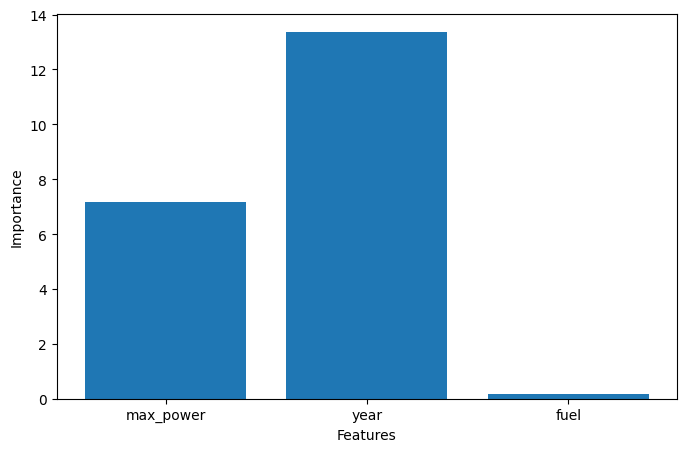

In [76]:
# plot the features indiviually
fig, axes = plt.subplots(figsize=(8,5))
axes.bar(x=np.arange(len(best_theta)), height=best_theta)

axes.set_xticks(np.arange(len(best_theta)))
axes.set_xticklabels(['max_power','year','fuel'])
axes.set_xlabel("Features")
axes.set_ylabel("Importance")
plt.show()

From the graph above, the 'year' feature has the most magnitude of coefficient, it indicates that year of the car is the most importance features in the dataset.

## 10. Inference

In [97]:
#import pickle for packing the model, label encoder, and scaler for further implementation.
import pickle

# save the loaded model to the destination directory
# The model can load directly in the mlrun file with runID: 613b87d29ad14c56b7aa49d68ff33dfa
# If I used the 'grid' model, I need to import class, and it will effect the performance of the website.

#save label encoder
filename1='../model/label_encoderA2.model'
pickle.dump(labelEncoder ,open(filename1,'wb'))

#save scaler
filename2='../model/minmax_scalerA2.model'
pickle.dump(scaler ,open(filename2,'wb'))


In [88]:
# load the model from a destination file 

loaded_encoder = pickle.load(open(filename1, 'rb'))
loaded_scaler = pickle.load(open(filename2, 'rb'))


In [89]:
#Double check the example data
df[['max_power','year','fuel']].loc[2]

max_power      78.0
year         2006.0
fuel            1.0
Name: 2, dtype: float64

In [98]:
sample = pd.DataFrame([[78.0,2006.0, 'Petrol']],columns=['max_power','year','fuel'])
#Scale the 'max_power','year' 
sample[scale_cols]  = loaded_scaler.transform(sample[scale_cols])
#Lable encoding 'fuel' before prediction
sample['fuel'] = loaded_encoder.transform(sample['fuel'])
#Predicted the price by loading model that we saved
predicted_exp = grid.predict(sample)
np.exp(predicted_exp[0])

19714.337577505354

In this assignment, the Chacky Company is coming up with the newer version of price prediction and the same problem that is price prediction. The algorithum is created from scratch. The LinearRegression, Lasso, Normal, Polynomial, Ridgh are created to satisfy the model creation. At first in the testing step, the MSE and R2 score is can not be acceptable (they reaches 100++ for MSE and -100++ for R2). After the debug and checking in all steps, it is come from the scaler that a previous model used which is the StandardScaler. The reason can come from the outliers of the features in dateset (max_power and year), the StandardScaler is sensitive to the outliers since it is based on the mean and standard deviation. The developer decided to change scaler to MinMaxScaler which based on range of the dataset.

Following the experiment part, the Linear and Polynomial regression models are trained along with the tracking of Mlflow, the following figures are the results of both regressions. 

Linear Regression experiment (sort by r2 score in ascending)

![LinearRegression](./picture/linear.PNG)

Polynomial Regression experiment (sort by r2 score in ascending)

![LinearRegression with polynomial](./picture/polynomial.PNG)

All experiments (sort by r2 score in ascending)

![Alltable](./picture/poly+linear.PNG)

From all experiments, the best model is Linear normal regression in stochastic gradient descent without momentum. The weight initialization is the Xavier method and the learning rate is 0.01. Even though this is the best score model, the mean square error score is still more than 1 and the R-square score is less than 0. This indicates that the dataset is not appropriate for the linear regression algorithm. The more efficient algorithm might be the random forest which is the selected algorithm of assignment 1. To improve the score of this model, the features must be changed.  

Best model params, MSE score, and R2 score

![bestone](./picture/Bestone.PNG)